In [ ]:
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("cell_samples.csv")

In [4]:
dataset

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


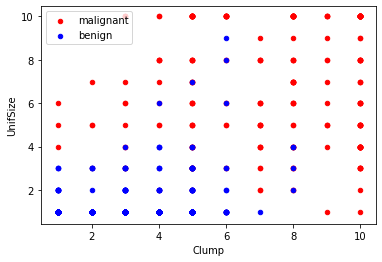

In [6]:
malig = dataset[dataset["Class"]==4].plot(kind="scatter",x="Clump", y="UnifSize", color="red",label="malignant")
dataset[dataset["Class"]==2].plot(kind="scatter",x="Clump", y="UnifSize", color="blue",label="benign",ax=malig)

In [7]:
dataset.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

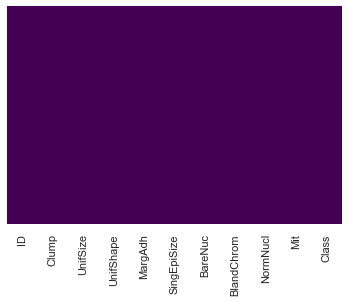

In [9]:
import seaborn as sns
sns.set()
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [10]:
dataset = dataset[pd.to_numeric(dataset["BareNuc"], errors="coerce").notnull()]

In [15]:
BareNuc = [i for i in dataset["BareNuc"].isnull() if i==True]

In [16]:
BareNuc

[]

In [19]:
dataset.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [22]:
dataset["BareNuc"] = dataset["BareNuc"].astype("int")
dataset.dtypes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [23]:
dataset.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
X = dataset[["Clump","UnifSize","UnifShape","MargAdh","SingEpiSize","BareNuc","BlandChrom","NormNucl","Mit"]]

In [27]:
y = dataset["Class"]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
print("Training Data Shape is :", X_train.shape, y_train.shape)
print("Testing data Shape is :", X_test.shape, y_test.shape)

Training Data Shape is : (457, 9) (457,)
Testing data Shape is : (226, 9) (226,)


In [39]:
from sklearn import svm
model1 = svm.SVC(kernel="rbf")
model1.fit(X_train,y_train)

model2 = svm.SVC(kernel="linear")
model2.fit(X_train,y_train)

model3 = svm.SVC(kernel="poly")
model3.fit(X_train,y_train)

model4 = svm.SVC(kernel="sigmoid")
model4.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
rbfpred = model1.predict(X_test)
linearpred = model2.predict(X_test)
polypred = model3.predict(X_test)
sigmoidpred = model4.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print("Accuracy of model by rbf func. is",accuracy_score(rbfpred,y_test))
print("Accuracy of model by linear func. is",accuracy_score(linearpred,y_test))
print("Accuracy of model by polynomial func is",accuracy_score(polypred,y_test))
print("Accuracy of model by sigmoid func is",accuracy_score(sigmoidpred,y_test))

Accuracy of model by rbf func. is 0.9513274336283186
Accuracy of model by linear func. is 0.9557522123893806
Accuracy of model by polynomial func is 0.9513274336283186
Accuracy of model by sigmoid func is 0.4469026548672566


In [42]:
from sklearn.metrics import f1_score
print("Accuracy of model by rbf func. is", f1_score(y_test, rbfpred, average='weighted'))
print("Accuracy of model by linear func. is", f1_score(y_test, linearpred, average='weighted'))
print("Accuracy of model by polynomial func. is", f1_score(y_test, polypred, average='weighted'))
print("Accuracy of model by sigmoid func. is", f1_score(y_test, sigmoidpred, average='weighted'))

Accuracy of model by rbf func. is 0.9510019648358443
Accuracy of model by linear func. is 0.9553905446490127
Accuracy of model by polynomial func. is 0.9508547432332553
Accuracy of model by sigmoid func. is 0.38813563908960513
